### Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

### Loading data

In [2]:
#loading dataset
#Using only val data bcs of memory error
df = pd.read_csv(r"C:\Users\Triloki-Gupta\Downloads\indegene\problem_2 - entity_recognition\Bio_data_IOB\val.tsv",
                       sep='\t', names=["Text","Labels"])

### EDA

In [3]:
#Shape and head of data
print(df.shape)
df.head()

(54736, 2)


,Text,Labels
0,The,O
1,relationship,O
2,of,O
3,glycosylation,O
4,and,O


In [4]:
#Checking null in data
df.isnull().sum()

Text      0
Labels    0
dtype: int64

O            50765
B-Protein     2494
I-Protein     1477
Name: Labels, dtype: int64


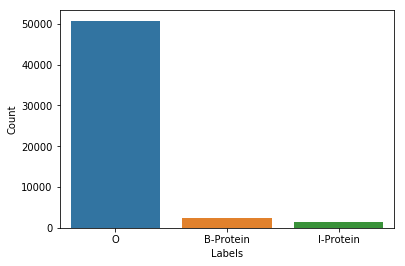

In [59]:
#Count number of data point in class/target
import seaborn as sns
import matplotlib.pyplot as plt
print(df['Labels'].value_counts())
sns.countplot(data=df, x='Labels')
plt.ylabel('Count')
plt.show()

In [6]:
df.groupby('Labels').size().reset_index(name='counts')

,Labels,counts
0,B-Protein,2494
1,I-Protein,1477
2,O,50765


In [7]:
#describtion of labels
entities = df.groupby("Labels")['Text']
entities.describe()

,count,unique,top,freq
Labels,,,,
B-Protein,2494,664,histone,117
I-Protein,1477,257,-,403
O,50765,6013,.,2223


### Data preprocessing

In [8]:
#divide data into features and target
#Transforms lists of feature-value mappings to vectors
X = df.drop('Labels', axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = df.Labels.values

In [29]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
X_train.shape, y_train.shape

((38315, 6630), (38315,))

### ML Model

#### Naive Bayes classifier

In [61]:
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [63]:
print(accuracy_score(y_pred=nb.predict(X_test),y_true=y_test))
print(classification_report(y_pred=nb.predict(X_test), y_true=y_test))

0.9635223189817916
              precision    recall  f1-score   support

   B-Protein       0.91      0.77      0.83       774
   I-Protein       0.71      0.22      0.33       438
           O       0.97      1.00      0.98     15209

   micro avg       0.96      0.96      0.96     16421
   macro avg       0.86      0.66      0.72     16421
weighted avg       0.96      0.96      0.96     16421



#### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
print(accuracy_score(y_pred=rf.predict(X_test),y_true=y_test))
print(classification_report(y_pred=rf.predict(X_test), y_true=y_test))

0.9635223189817916
              precision    recall  f1-score   support

   B-Protein       0.91      0.77      0.83       774
   I-Protein       0.68      0.23      0.35       438
           O       0.97      0.99      0.98     15209

   micro avg       0.96      0.96      0.96     16421
   macro avg       0.86      0.66      0.72     16421
weighted avg       0.96      0.96      0.96     16421



### Conclusion

- Using only val dataset because of memory error.
- Converting features into numerical vector
- Applied ML model on train and test on test data
- Accuracy is **96.355** with both model